In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
print(images_train.shape)
print(cls_train.shape)
print(labels_train.shape)

(50000, 32, 32, 3)
(50000,)
(50000, 10)


In [7]:
labels_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

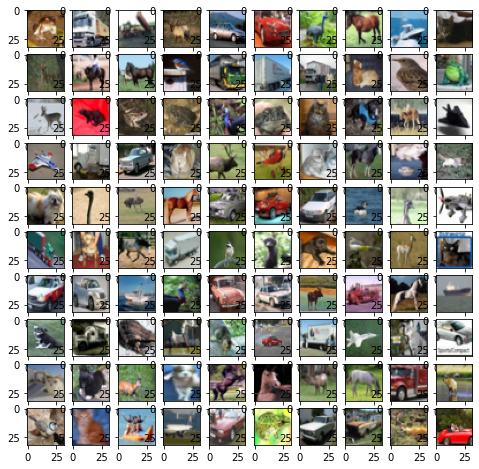

In [8]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(images_train[i])
plt.show()

#### PCA 

In [9]:
from sklearn.decomposition import PCA

In [10]:
import numpy as np

In [11]:
images_train_reshaped = images_train.reshape(50000,32*32*3)
images_train_reshaped.shape

(50000, 3072)

In [12]:
pca=PCA()
pca.fit(images_train_reshaped)

PCA()

In [13]:
pca.explained_variance_

array([5.53633226e+01, 2.14265348e+01, 1.27464910e+01, ...,
       1.64690026e-06, 1.60936325e-06, 1.58719044e-06])

In [14]:
k=0
num=0
t=sum(pca.explained_variance_)
while(num/t<0.99):
    num+=pca.explained_variance_[k]
    k+=1
k

658

In [15]:
pca = PCA(n_components = k, whiten = True)
images_train_reshaped = pca.fit_transform(images_train_reshaped)

In [16]:
images_train_reshaped

array([[-0.86027628,  0.58956777,  0.42062095, ...,  1.44994032,
         0.41465116, -0.10188437],
       [ 0.11152023, -0.20522094,  1.68161846, ..., -0.33378551,
        -1.11934558,  0.62246471],
       [ 1.03891411, -2.48917687, -0.77127413, ...,  0.19424345,
         1.19809564,  0.64356752],
       ...,
       [ 0.09506512, -2.45038108, -0.11033342, ..., -0.58601391,
         0.50933173,  1.16580023],
       [ 1.52781059, -0.72932918,  1.5590617 , ...,  1.43715093,
        -0.43338938,  2.58168688],
       [ 0.56349842, -0.25582611, -1.24529006, ...,  0.03853192,
         0.37591629,  0.06749583]])

In [17]:
images_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [18]:
images_test.shape

(10000, 32, 32, 3)

In [19]:
images_test=images_test.reshape(10000,32*32*3)

In [20]:
images_test_transformed = pca.transform(images_test)
images_test_transformed.shape

(10000, 658)

##### Random Forest Classifier 

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
rf = RandomForestClassifier()
rf.fit(images_train_reshaped,cls_train)
cls_pred = rf.predict(images_test_transformed)
print(classification_report(cls_test, cls_pred))
print('<--------------------------------------------------------------------------------------------------------------------->')
print(confusion_matrix(cls_test,cls_pred ))

              precision    recall  f1-score   support

           0       0.45      0.50      0.47      1000
           1       0.42      0.51      0.46      1000
           2       0.30      0.26      0.28      1000
           3       0.24      0.22      0.23      1000
           4       0.37      0.36      0.36      1000
           5       0.33      0.31      0.32      1000
           6       0.45      0.46      0.45      1000
           7       0.42      0.33      0.37      1000
           8       0.50      0.56      0.53      1000
           9       0.39      0.41      0.40      1000

    accuracy                           0.39     10000
   macro avg       0.39      0.39      0.39     10000
weighted avg       0.39      0.39      0.39     10000

<--------------------------------------------------------------------------------------------------------------------->
[[500  59  52  43  29  31  28  41 156  61]
 [ 40 505  22  41  24  42  27  42  67 190]
 [133  33 263  78 173  81 113  51  

In [26]:
from sklearn.metrics import accuracy_score
random_forest_score = accuracy_score(cls_test, cls_pred)
random_forest_score

0.3908

##### KNN 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(images_train_reshaped,cls_train)
cls_pred2 = knn.predict(images_test_transformed)
print(classification_report(cls_test, cls_pred2))
print('<--------------------------------------------------------------------------------------------------------------------->')
print(confusion_matrix(cls_test,cls_pred2 ))

              precision    recall  f1-score   support

           0       0.18      0.18      0.18      1000
           1       1.00      0.02      0.03      1000
           2       0.29      0.05      0.09      1000
           3       0.23      0.02      0.03      1000
           4       0.17      0.29      0.21      1000
           5       0.43      0.00      0.01      1000
           6       0.63      0.02      0.03      1000
           7       1.00      0.00      0.00      1000
           8       0.12      0.87      0.22      1000
           9       1.00      0.00      0.00      1000

    accuracy                           0.14     10000
   macro avg       0.51      0.14      0.08     10000
weighted avg       0.51      0.14      0.08     10000

<--------------------------------------------------------------------------------------------------------------------->
[[181   0  15   4  61   1   1   0 737   0]
 [113  17   8   7 125   0   4   0 726   0]
 [106   0  54   6 199   1   2   0 6

In [30]:
knn_score = accuracy_score(cls_test, cls_pred2)
knn_score

0.1446

##### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(images_train_reshaped,cls_train)
cls_pred3 = lr.predict(images_test_transformed)
print(classification_report(cls_test, cls_pred3))
print('<--------------------------------------------------------------------------------------------------------------------->')
print(confusion_matrix(cls_test,cls_pred3 ))

              precision    recall  f1-score   support

           0       0.46      0.49      0.47      1000
           1       0.46      0.46      0.46      1000
           2       0.31      0.27      0.29      1000
           3       0.28      0.26      0.27      1000
           4       0.35      0.29      0.32      1000
           5       0.33      0.34      0.34      1000
           6       0.40      0.46      0.43      1000
           7       0.44      0.44      0.44      1000
           8       0.50      0.54      0.52      1000
           9       0.44      0.46      0.45      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000

<--------------------------------------------------------------------------------------------------------------------->
[[489  46  57  37  19  30  23  57 170  72]
 [ 54 463  33  39  26  44  39  52  80 170]
 [ 99  43 273  85 117  88 143  80  

In [33]:
logistic_regression_score = accuracy_score(cls_test, cls_pred3)
logistic_regression_score

0.4018

#### SVM 

In [35]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(images_train_reshaped,cls_train)
cls_pred4 = svc.predict(images_test_transformed)
print(classification_report(cls_test, cls_pred4))
print('<--------------------------------------------------------------------------------------------------------------------->')
print(confusion_matrix(cls_test,cls_pred4 ))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54      1000
           1       0.49      0.62      0.55      1000
           2       0.40      0.36      0.38      1000
           3       0.35      0.36      0.36      1000
           4       0.44      0.37      0.40      1000
           5       0.39      0.35      0.37      1000
           6       0.54      0.52      0.53      1000
           7       0.56      0.49      0.52      1000
           8       0.64      0.59      0.62      1000
           9       0.45      0.60      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000

<--------------------------------------------------------------------------------------------------------------------->
[[526  69  53  28  19  19  15  22 149 100]
 [ 43 625   8  24  11  16  24  27  29 193]
 [ 86  43 359  89 118  75  94  57  

In [36]:
svc_score = accuracy_score(cls_test, cls_pred4)
svc_score

0.4796

### Comparison between various Classifier

In [37]:
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)

RandomForestClassifier :  0.3908
K Nearest Neighbors :  0.1446
Logistic Regression :  0.4018
Support Vector Classifier :  0.4796


#### Till Now, Best accuracy comes from Support vector classifier

In [49]:
cls_pred4

array([3, 8, 0, ..., 3, 1, 4])

In [50]:
predictions=[]
for i in range(len(cls_pred4)):
    predictions.append(class_names[cls_pred[i]])

In [51]:
np.savetxt("predictions_cifar.csv", predictions, delimiter=',', fmt="%s")